<a href="https://colab.research.google.com/github/eporrasm/TAE-trabajo3/blob/main/Trabajo3_TAE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["incidentes_viales.csv"]), sep = ";",  low_memory = False , encoding = 'utf_8')
#df = pd.read_csv("/content/incidentes_viales.csv", sep = ";",  low_memory = False , encoding = 'utf_8')

Saving incidentes_viales.csv to incidentes_viales.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded["incidentes_viales.csv"]), sep = ";",  low_memory = False , encoding = 'utf_8')

In [ ]:
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60


In [ ]:
df.shape

(270765, 18)

**Limpieza de la base**

Datos faltantes

In [ ]:
df.isna().sum()

AÑO                          0
CBML                     18156
CLASE_ACCIDENTE              6
DIRECCION                    0
DIRECCION ENCASILLADA      391
DISEÑO                    1148
EXPEDIENTE                 110
FECHA_ACCIDENTE              0
FECHA_ACCIDENTES             0
GRAVEDAD_ACCIDENTE           0
MES                          0
NRO_RADICADO                 5
NUMCOMUNA                    0
BARRIO                   19006
COMUNA                   12798
LOCATION                     0
X                            0
Y                            0
dtype: int64

**Eliminación datos**

Se eliminan los siguientes campos. 


*   CBML = No relevante para el análisis.
*   DIRECCION = Se tiene la variable de location.
*   DIRECCION ENCASILLADA = Se repite.
*   EXPEDIENTE = Es un registro aleatorio sin análisis.
*   FECHA_ACCIDENTES = Se repite.
*   NRO_RADICADO = Numero aleatorio.
*   COMUNA = se tumba comuna pues tiene mucho nan y existe otra columna con la misma información
*   X & Y = Debido a que ya tenemos una columna de localización

In [ ]:
df.drop(['CBML','DIRECCION','DIRECCION ENCASILLADA','EXPEDIENTE','FECHA_ACCIDENTES', 'NRO_RADICADO','COMUNA','X','Y'],axis = 1 , inplace = True)

**Problemas enconding**

In [ ]:
df.isna().sum()

AÑO                       0
CLASE_ACCIDENTE           6
DISEÑO                 1148
FECHA_ACCIDENTE           0
GRAVEDAD_ACCIDENTE        0
MES                       0
NUMCOMUNA                 0
BARRIO                19006
LOCATION                  0
dtype: int64

In [ ]:
df['AÑO'].unique()

array(['2015', '2014', '2016', '2017', '2018', '2019\\r', '2019', '2020'],
      dtype=object)

In [ ]:
df['CLASE_ACCIDENTE'].unique()

array(['Caida Ocupante', 'Choque', 'Otro', 'Atropello', 'Volcamiento',
       'Caída de Ocupante', 'Caída Ocupante', 'Incendio', nan,
       'Caida de Ocupante'], dtype=object)

In [ ]:
df['DISEÑO'].unique()

array(['Tramo de via', 'Interseccion', 'Glorieta', 'Lote o Predio',
       'Paso a Nivel', 'Puente', 'Paso Elevado', 'Ciclo Ruta',
       'Paso Inferior', nan, 'Via peatonal', 'Pontón', 'Tunel',
       'Pont\\xF3n'], dtype=object)

In [ ]:
df['FECHA_ACCIDENTE'].unique()

array(['21/10/2015 05:58:00', '05/11/2015 03:00:00',
       '21/10/2015 07:40:00', ..., '31/08/2020 18:50:00',
       '31/08/2020 19:05:00', '31/08/2020 19:30:00'], dtype=object)

In [ ]:
df['GRAVEDAD_ACCIDENTE'].unique()

array(['Con heridos', 'Solo daños', 'Con muertos', 'Solo da\\xF1os'],
      dtype=object)

In [ ]:
df['MES'].unique()

array([10, 11, 12,  9,  4,  3,  5,  6,  7,  8,  1,  2])

In [ ]:
df['AÑO']= df['AÑO'].apply(lambda x : '2019' if x == '2019\\r' else x)
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].apply(lambda x : 'Caída de Ocupante' if type(x) != float and x[0:2] =='Ca' else x)
df['DISEÑO'] = df['DISEÑO'].apply(lambda x : 'Pontón' if x == 'Pont\\xF3n' else x)
df['GRAVEDAD_ACCIDENTE'] = df['GRAVEDAD_ACCIDENTE'].apply(lambda x: 'Solo daños' if x == 'Solo da\\xF1os' else x)

In [ ]:
df['NUMCOMUNA'].unique()

array(['10', '02', '01', '15', '14', '11', '07', '06', '04', '09', '05',
       '80', 'Sin Inf', '13', '08', '16', '03', '12', '70', '60', '90',
       'In', 'SN', '0', '50', 'AU', '5', '7', '9', '4', '3', '1', '2',
       '8', '6'], dtype=object)

Para el número de comuna hay  datos que no son consistentes ('Sin Inf','In','SN','0','AU'). Se coloca NA ya que no tenemos información de esta.

In [ ]:
len(df[df['NUMCOMUNA'].isin(['0','Sin Inf','In','SN','AU'])])

20127

In [ ]:
df['NUMCOMUNA'] = df['NUMCOMUNA'].apply(lambda x: 'NA' if x in(['0','Sin Inf','In','SN','AU']) else x)

In [ ]:
df['BARRIO'].unique()

array(['Barrio Colón', 'San Diego', 'La Francia',
       'Santo Domingo Savio No. 1', 'Santa Fé', 'La Florida',
       'Los Conquistadores', 'La Alpujarra', 'Villa Nueva',
       'Facultad de Minas U. Nacional', 'La Esperanza',
       'Perpetuo Socorro', 'Campo Valdés No. 1', 'Miraflores',
       'Oleoducto', 'Terminal de Transporte', 'Gerona',
       'U.D. Atanasio Girardot', 'Alejandro Echavarría',
       'Cabecera San Antonio de Prado', 'Manila', 'Los Balsos No.2',
       'Moravia', nan, 'Tenche', 'Universidad Nacional', 'Los Colores',
       'Caribe', 'Juan XXIII La Quiebra', 'Belalcázar', 'Santa Cruz',
       'Sucre', 'La Candelaria', 'El Estadio', 'Suramericana',
       'La Gloria', 'Centro Administrativo', 'Las Estancias',
       'Aures No. 2', 'Los Ángeles', 'Castilla', 'La Salle', 'La América',
       'Picacho', 'Bosques de San Pablo', 'La Aguacatala',
       'Playón de Los Comuneros', 'Estación Villa', 'La Colina',
       'Popular', 'Villa del Socorro', 'Cucaracho',
       'S

La base muestra comportamiento anomalo para ciertas palabras, por ende es necesario organizar los datos de forma manual.

In [ ]:
def barrio(x):
    
    z = {'Bel\\xE9n' : 'Belén', 'Belalc\\xE1zar' : 'Belalcázar','H\\xE9ctor Abad G\\xF3mez': 'Héctor Abad Gómez',
        'San Joaqu\\xEDn' : 'San Joaquín', 'Santa F\\xE9' : 'Santa Fé', 'Coraz\\xF3n de Jes\\xFAs' : 'Corazón de Jesús',
        'Alfonso L\\xF3pez': 'Alfonso López', 'Santa Mar\\xEDa de Los \\xC1ngeles' : 'Santa María de Los Ángeles',
        'El Rinc\\xF3n' : 'El Rincón', 'Alejandr\\xEDa': 'Alejandría', 'Campo Vald\\xE9s No. 1' : 'Campo Valdés No. 1',
        'Barrio Col\\xF3n' : 'Barrio Colón','Jard\\xEDn Bot\\xE1nico' : 'Jardín Botánico', 'Estaci\\xF3n Villa' : 'Estación Villa',
       'Barrio de Jes\\xFAs' : 'Barrio de Jesús', 'Barrio Crist\\xF3bal': 'Barrio Cristóbal', 'Boyac\\xE1' : 'Boyacá',
       'Mosc\\xFA No. 1':'Moscú No. 1', 'Sim\\xF3n Bol\\xEDvar' : 'Simón Bolívar', 'Nueva Villa de la Iguan\\xE1' : 'Nueva Villa de la Iguaná',
        'Bombon\\xE1 No. 2': 'Bomboná No. 2', 'La Pi\\xF1uela' : 'La Piñuela' , 'Play\\xF3n de Los Comuneros': 'Playón de Los Comuneros',
       'Jes\\xFAs Nazareno' : 'Jesús Nazareno', '\\xC1rea de Expansi\\xF3n Pajarito': 'Área de Expansión Pajarito', 'F\\xE1tima':'Fátima',
        'San Germ\\xE1n' : 'San Germán', 'Diego Echavarr\\xEDa':'Diego Echavarría', 'Mosc\\xFA No. 2':'Moscú No. 2', 'La Am\\xE9rica': 'La América',
        'Alejandro Echavarr\\xEDa':'Alejandro Echavarría','L\\xF3pez de Mesa':'López de Mesa', 'Los \\xC1ngeles' : 'Los Ángeles',
       '\\xC1rea de Expansi\\xF3n Altos de Calasanz':'Área de Expansión Altos de Calasanz' ,'Santa Mar\\xEDa de los \\xC1ngeles' : 'Santa María de los Ángeles', 
        'Santa M\\xF3nica': 'Santa Mónica', 'La Mansi\\xF3n': 'La Mansión', 'San Mart\\xEDn de Porres':'San Martín de Porres', 'C\\xF3rdoba': 'Córdoba',
       'Santa Luc\\xEDa': 'Santa Lucía', 'Batall\\xF3n Girardot': 'Batallón Girardot', 'El Vel\\xF3dromo':'El Velódromo', 'Andaluc\\xEDa': 'Andalucía', 
        'Bombon\\xE1 No.1' :'Bomboná No.1' , 'Mar\\xEDa Cano Carambolas': 'María Cano Carambolas', 'Nueva Villa de Aburr\\xE1' : 'Nueva Villa de Aburrá',
       '\\xC1rea de Expansi\\xF3n San Antonio de Prado': 'Área de Expansión San Antonio de Prado','Los Alc\\xE1zares' : 'Los Alcázares', 'El Coraz\\xF3n': 'El Corazón',
        'Catalu\\xF1a' : 'Cataluña', 'Berl\\xEDn': 'Berlín', 'Antonio Nari\\xF1o' : 'Antonio Nariño', 'Hospital San Vicente de Pa\\xFAl': 'Hospital San Vicente de Paúl',
       'San Jos\\xE9 de la Monta\\xF1a' : 'San José de la Montaña', 'Campo Vald\\xE9s No.2' : 'Campo Valdés No.2', 'San Jos\\xE9 la Cima No.2': 'San José la Cima No.2',
        'Mosc\\xFA No.2' : 'Moscú No. 2', 'San Jos\\xE9 la Cima No. 1': 'San José la Cima No. 1', 'Bombon\\xE1 No. 1' : 'Bomboná No. 1', 'Santa In\\xE9s': 'Santa Inés',
        'Campo Vald\\xE9s No. 2' : 'Campo Valdés No. 2'}
    
    
    if x in z:
        x = z[x]
    elif type(x) == float :
        x = None
    elif x[0] in ['0','1','2','3','4','5','6','7','8','9']:
        x = None
    else:
        x = x
    return x

In [ ]:
df.BARRIO.str.extract('(\d+)').notna().sum()

0    25123
dtype: int64

In [ ]:
df['BARRIO'] = df['BARRIO'].apply(barrio)

No se puede convertir a formato fecha de la siguiente forma "df["FECHA_ACCIDENTE"]=pd.to_datetime(df["FECHA_ACCIDENTE"],format="%d/%m/%Y %H:%M:%S")" ya que hay campos que no cumplen el formato como por ejemplo '13/05/2016 Sin Inf'

Creamos nuevas variables HORA , FECHA, SEMANA, MES, DIA DEL AÑO, DIA DEL MES, DIA DE LA SEMANA

In [ ]:
df['HORA'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.split(' ')[1])
df['HORA'] = df['HORA'].apply(lambda x: None if x == 'Sin' or x == '' else x)

In [ ]:
df['HORA'] = pd.to_datetime(df['HORA'],format= '%H:%M:%S' ).dt.time
df['FECHA'] = df['FECHA_ACCIDENTE'].apply(lambda x: x.split(' ')[0])
df['FECHA'] = pd.to_datetime(df['FECHA'], format="%d/%m/%Y")

In [ ]:
df['SEMANA'] = df['FECHA'].apply(lambda x : x.strftime("%V"))
df['MES'] = df['FECHA'].dt.month
df['DIA_DEL_AÑO'] = df['FECHA'].apply(lambda x: str(x.timetuple().tm_yday)) 
df['DIA_DEL_MES'] = df['FECHA'].apply(lambda x: x.strftime('%d'))
df['DIA_SEMANA'] = df['FECHA'].apply(lambda x: x.strftime('%A'))

In [ ]:
df

,AÑO,CLASE_ACCIDENTE,DISEÑO,FECHA_ACCIDENTE,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,LOCATION,HORA,FECHA,SEMANA,DIA_DEL_AÑO,DIA_DEL_MES,DIA_SEMANA
0,2015,Caída de Ocupante,Tramo de via,21/10/2015 05:58:00,Con heridos,10,10,Barrio Colón,"[-75.5688011014, 6.24312304123]",05:58:00,2015-10-21,43,294,21,Wednesday
1,2015,Choque,Tramo de via,05/11/2015 03:00:00,Solo daños,11,10,San Diego,"[-75.5693883283, 6.22870030622]",03:00:00,2015-11-05,45,309,05,Thursday
2,2015,Otro,Tramo de via,21/10/2015 07:40:00,Con heridos,10,02,La Francia,"[-75.5503911403, 6.29869502502]",07:40:00,2015-10-21,43,294,21,Wednesday
3,2015,Atropello,Tramo de via,21/10/2015 12:00:00,Con heridos,10,01,Santo Domingo Savio No. 1,"[-75.5442195069, 6.30019383306]",12:00:00,2015-10-21,43,294,21,Wednesday
4,2015,Choque,Tramo de via,03/11/2015 06:16:00,Solo daños,11,15,Santa Fé,"[-75.578180998, 6.21699243701]",06:16:00,2015-11-03,45,307,03,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2020,Caída de Ocupante,Tramo de via,31/08/2020 18:50:00,Con heridos,8,10,El Chagualo,"[-75.5731343044, 6.26063534822]",18:50:00,2020-08-31,36,244,31,Monday
270761,2020,Otro,Tramo de via,31/08/2020 18:50:00,Con heridos,8,11,Cuarta Brigada,"[-75.5902062951, 6.26040455473]",18:50:00,2020-08-31,36,244,31,Monday
270762,2020,Choque,Tramo de via,31/08/2020 19:05:00,Solo daños,8,5,Cementerio Universal,"[-75.5735398111, 6.27625838886]",19:05:00,2020-08-31,36,244,31,Monday
270763,2020,Atropello,Tramo de via,31/08/2020 19:30:00,Con heridos,8,2,Villa del Socorro,"[-75.5515085985, 6.29359892373]",19:30:00,2020-08-31,36,244,31,Monday


Organizamos longitud y latitud

In [ ]:
df['LOCATION2'] = df['LOCATION'].apply(lambda x: x.split(',')) 
df['LONGITUD'] = df['LOCATION2'].apply(lambda x: float (x[0][1:-1]))
df['LATITUD'] = df['LOCATION2'].apply(lambda x: float (x[1][1:-1]))
df.drop(['LOCATION','LOCATION2','FECHA_ACCIDENTE'], axis = 1, inplace = True)

In [ ]:
df

,AÑO,CLASE_ACCIDENTE,DISEÑO,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,HORA,FECHA,SEMANA,DIA_DEL_AÑO,DIA_DEL_MES,DIA_SEMANA,LONGITUD,LATITUD
0,2015,Caída de Ocupante,Tramo de via,Con heridos,10,10,Barrio Colón,05:58:00,2015-10-21,43,294,21,Wednesday,-75.568801,6.243123
1,2015,Choque,Tramo de via,Solo daños,11,10,San Diego,03:00:00,2015-11-05,45,309,05,Thursday,-75.569388,6.228700
2,2015,Otro,Tramo de via,Con heridos,10,02,La Francia,07:40:00,2015-10-21,43,294,21,Wednesday,-75.550391,6.298695
3,2015,Atropello,Tramo de via,Con heridos,10,01,Santo Domingo Savio No. 1,12:00:00,2015-10-21,43,294,21,Wednesday,-75.544220,6.300194
4,2015,Choque,Tramo de via,Solo daños,11,15,Santa Fé,06:16:00,2015-11-03,45,307,03,Tuesday,-75.578181,6.216992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2020,Caída de Ocupante,Tramo de via,Con heridos,8,10,El Chagualo,18:50:00,2020-08-31,36,244,31,Monday,-75.573134,6.260635
270761,2020,Otro,Tramo de via,Con heridos,8,11,Cuarta Brigada,18:50:00,2020-08-31,36,244,31,Monday,-75.590206,6.260405
270762,2020,Choque,Tramo de via,Solo daños,8,5,Cementerio Universal,19:05:00,2020-08-31,36,244,31,Monday,-75.573540,6.276258
270763,2020,Atropello,Tramo de via,Con heridos,8,2,Villa del Socorro,19:30:00,2020-08-31,36,244,31,Monday,-75.551509,6.293599


Organizamos la jornada del dia.

In [ ]:
def momento(x):
    
    Hora1 = datetime.strptime('06:00:00', "%X").time()
    Hora2 = datetime.strptime('12:00:00', "%X").time()
    Hora3 = datetime.strptime('18:00:00', "%X").time()
    Hora4 = datetime.strptime('23:59:59', "%X").time()
    
    if type(x) != type(Hora1):
        return None
    elif x >= Hora1 and x < Hora2:
        return 'Mañana'
    elif x >= Hora2 and x < Hora3:
        return 'Tarde'
    elif x >= Hora3 and x < Hora4:
        return 'Noche'
    else:
        return 'Madrugada'

In [ ]:
df['MOMENTO'] = df['HORA'].apply(momento)

Análisis datos null

In [ ]:
df_datos = df.groupby(['AÑO','MES'])[['BARRIO']].agg([ lambda x : x.isnull().sum(), lambda x : x.notnull().sum()])
df_datos.columns = df_datos.columns.get_level_values(1)
df_datos.rename({df_datos.columns[0]:'Data perdida',df_datos.columns[1] : 'Datos completos'}, axis = 1, inplace = True)
df_perdidos=df_datos

In [ ]:
df_perdidos


Data perdida  Datos completos
AÑO  MES                               
2014 7             231             3189
     8             307             3633
     9             290             3587
     10            266             3470
     11            275             3337
...                ...              ...
2020 4              86              812
     5             166             1575
     6             182             2009
     7             182             1970
     8             199             2071

[74 rows x 2 columns]

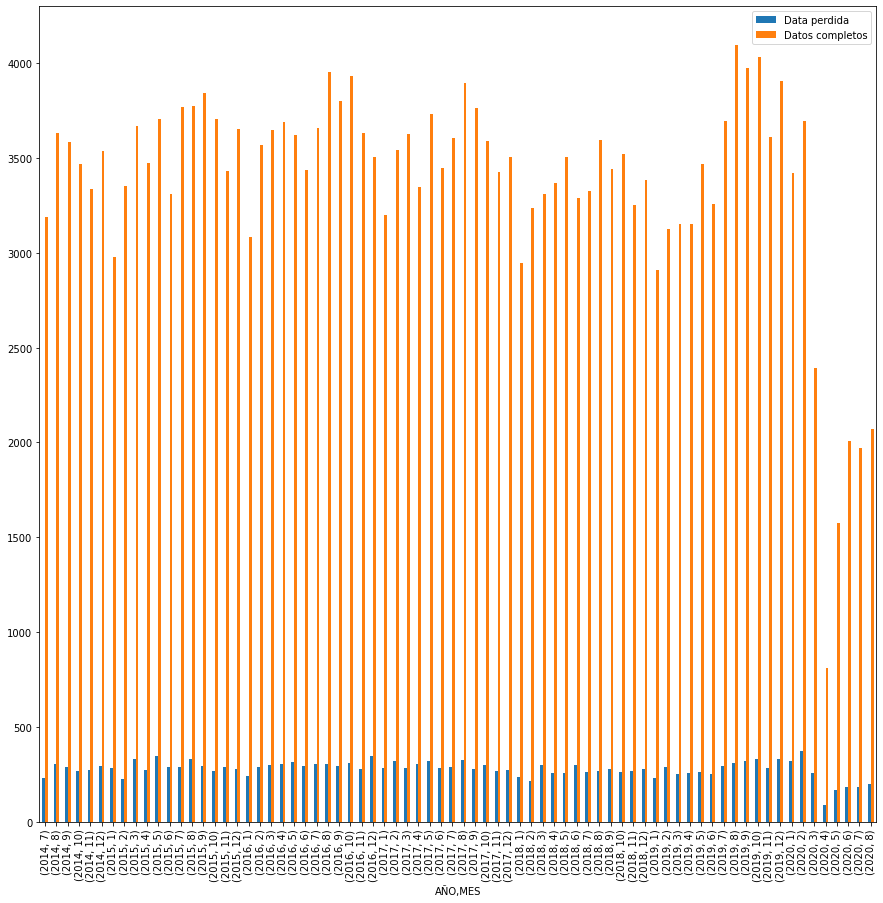

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
df_perdidos.plot.bar(ax=ax)

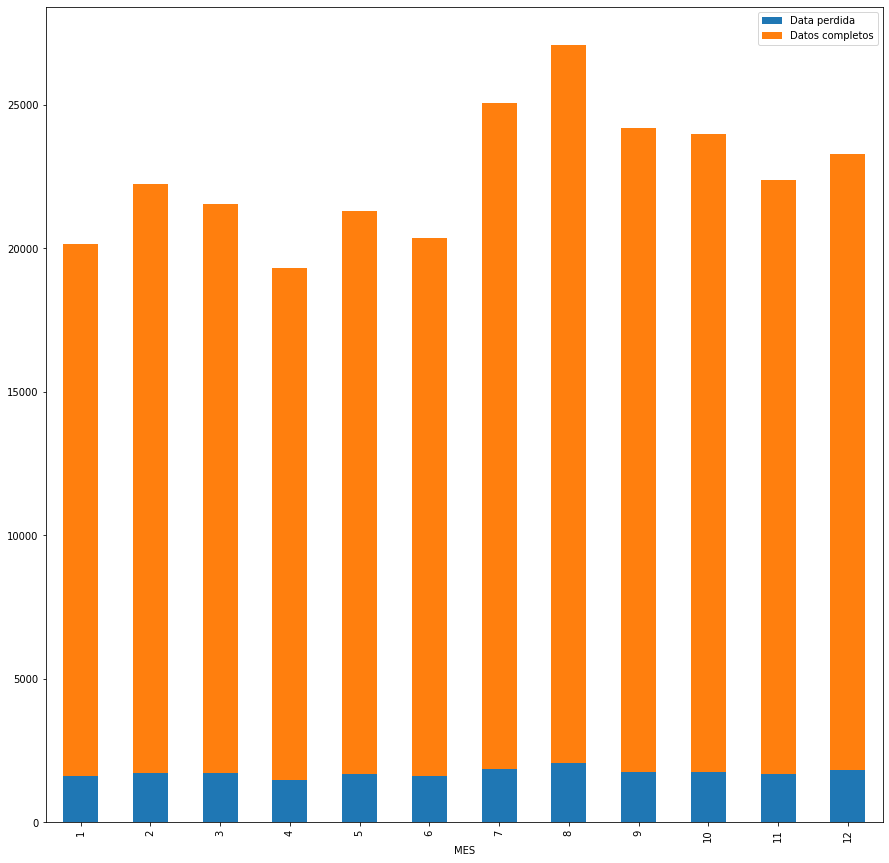

In [ ]:
df_datos1 = df.groupby(['MES'])[['BARRIO']].agg([ lambda x : x.isnull().sum(), lambda x : x.notnull().sum()])
df_datos1.columns = df_datos1.columns.get_level_values(1)
df_datos1.rename({df_datos1.columns[1]:'Datos completos',df_datos1.columns[0] : 'Data perdida'}, axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(15, 15))
df_datos1.plot.bar(ax=ax,stacked=True)

Como no representan una gran participación los eliminamos

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(249083, 16)

In [ ]:
df.isna().sum()

AÑO                   0
CLASE_ACCIDENTE       0
DISEÑO                0
GRAVEDAD_ACCIDENTE    0
MES                   0
NUMCOMUNA             0
BARRIO                0
HORA                  0
FECHA                 0
SEMANA                0
DIA_DEL_AÑO           0
DIA_DEL_MES           0
DIA_SEMANA            0
LONGITUD              0
LATITUD               0
MOMENTO               0
dtype: int64

**Análisis descriptivo**

In [ ]:
df.describe()

,MES,LONGITUD,LATITUD
count,249083.000000,249083.000000,249083.000000
mean,6.688622,-75.577256,6.250103
std,3.413395,0.019369,0.028643
min,1.000000,-75.703776,6.166626
25%,4.000000,-75.587163,6.231888
50%,7.000000,-75.574881,6.250033
75%,10.000000,-75.565041,6.271328
max,12.000000,-75.500234,6.367985


In [ ]:
tabla=(df.groupby("CLASE_ACCIDENTE").agg(frequency=("CLASE_ACCIDENTE", "count")))
tabla.sort_values(by='frequency', ascending=False)

,frequency
CLASE_ACCIDENTE,
Choque,168510
Otro,26653
Atropello,23419
Caída de Ocupante,21453
Volcamiento,9020
Incendio,28


In [ ]:
tabla=(df.groupby("GRAVEDAD_ACCIDENTE").agg(frequency=("GRAVEDAD_ACCIDENTE", "count")))
tabla.sort_values(by='frequency', ascending=False)

,frequency
GRAVEDAD_ACCIDENTE,
Con heridos,136916
Solo daños,111845
Con muertos,322


In [ ]:
tabla=(df.groupby("NUMCOMUNA").agg(frequency=("NUMCOMUNA", "count")))
tabla.sort_values(by='frequency', ascending=False)

,frequency
NUMCOMUNA,
10,51829
11,26905
05,23104
14,21556
15,18345
16,16700
07,15325
04,13207
09,8990


In [ ]:
tabla=(df.groupby("DIA_SEMANA").agg(frequency=("DIA_SEMANA", "count")))
tabla.sort_values(by='frequency', ascending=False)

,frequency
DIA_SEMANA,
Friday,39661
Tuesday,39000
Wednesday,37929
Thursday,37625
Saturday,35834
Monday,35798
Sunday,23236


In [ ]:
tabla=(df.groupby("AÑO").agg(frequency=("AÑO", "count")))
tabla.sort_values(by='frequency', ascending=False)

,frequency
AÑO,
2016,43284
2017,42461
2015,42421
2019,42385
2018,39961
2014,20625
2020,17946


In [ ]:
tabla=(df.groupby("FECHA").agg(frequency=("CLASE_ACCIDENTE" , "count")))
tabla.sort_values(by='FECHA', ascending=True)

,frequency
FECHA,
2014-07-04,22
2014-07-05,116
2014-07-06,76
2014-07-07,164
2014-07-08,118
...,...
2020-08-27,79
2020-08-28,99
2020-08-29,85


In [ ]:
tabla.dtypes

frequency    int64
dtype: object

In [ ]:
tabla.reset_index(inplace=True)
tabla.dtypes

FECHA        datetime64[ns]
frequency             int64
dtype: object

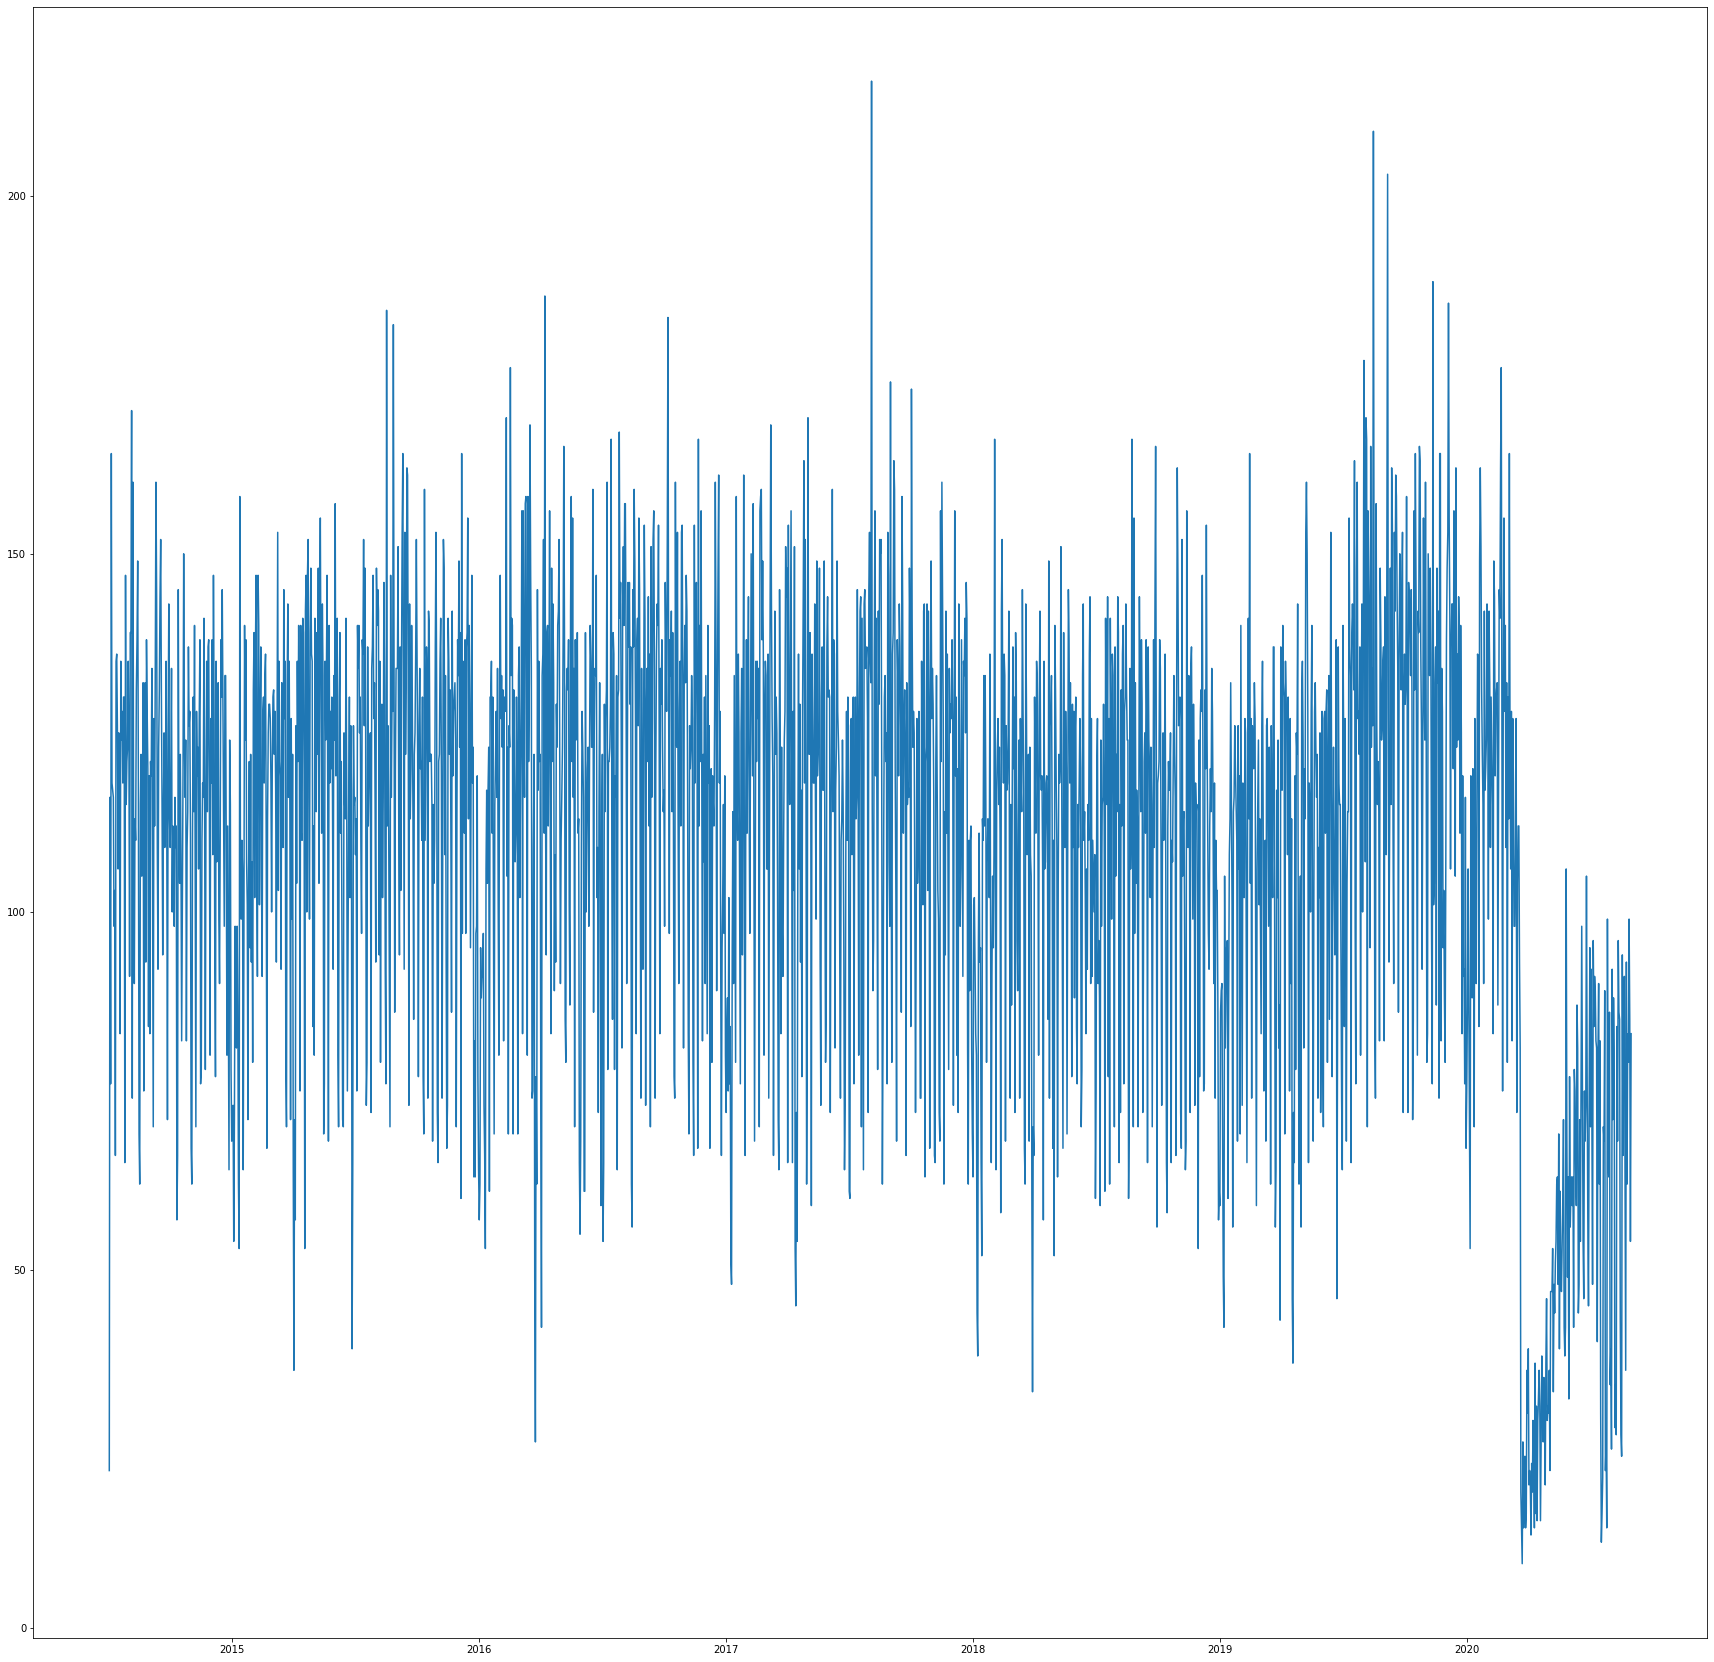

In [ ]:
plt.figure(figsize=(30,30))
plt.plot(tabla.FECHA,tabla.frequency)

Se evidencia que en el año 2020 hubo una caida en los incidente que se asocia a la cuarentena obligatoria por el COVID

In [ ]:
import pickle
file = open("df_principal.pkl", "wb")
pickle.dump(df, file)

In [ ]:
file2 = open("df_principal.pkl", "rb")
data = pickle.load(file2)
data

,AÑO,CLASE_ACCIDENTE,DISEÑO,GRAVEDAD_ACCIDENTE,MES,NUMCOMUNA,BARRIO,HORA,FECHA,SEMANA,DIA_DEL_AÑO,DIA_DEL_MES,DIA_SEMANA,LONGITUD,LATITUD,MOMENTO
0,2015,Caída de Ocupante,Tramo de via,Con heridos,10,10,Barrio Colón,05:58:00,2015-10-21,43,294,21,Wednesday,-75.568801,6.243123,Madrugada
1,2015,Choque,Tramo de via,Solo daños,11,10,San Diego,03:00:00,2015-11-05,45,309,05,Thursday,-75.569388,6.228700,Madrugada
2,2015,Otro,Tramo de via,Con heridos,10,02,La Francia,07:40:00,2015-10-21,43,294,21,Wednesday,-75.550391,6.298695,Mañana
3,2015,Atropello,Tramo de via,Con heridos,10,01,Santo Domingo Savio No. 1,12:00:00,2015-10-21,43,294,21,Wednesday,-75.544220,6.300194,Tarde
4,2015,Choque,Tramo de via,Solo daños,11,15,Santa Fé,06:16:00,2015-11-03,45,307,03,Tuesday,-75.578181,6.216992,Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2020,Caída de Ocupante,Tramo de via,Con heridos,8,10,El Chagualo,18:50:00,2020-08-31,36,244,31,Monday,-75.573134,6.260635,Noche
270761,2020,Otro,Tramo de via,Con heridos,8,11,Cuarta Brigada,18:50:00,2020-08-31,36,244,31,Monday,-75.590206,6.260405,Noche
270762,2020,Choque,Tramo de via,Solo daños,8,5,Cementerio Universal,19:05:00,2020-08-31,36,244,31,Monday,-75.573540,6.276258,Noche
270763,2020,Atropello,Tramo de via,Con heridos,8,2,Villa del Socorro,19:30:00,2020-08-31,36,244,31,Monday,-75.551509,6.293599,Noche


**Modelo predictivo**

In [ ]:
df2 = df.groupby(['FECHA','CLASE_ACCIDENTE'])[['CLASE_ACCIDENTE']].count()
df2.rename({df2.columns[0]: 'Total'}, axis = 1, inplace = True)
df2 = df2.reset_index()
df2.head(5)

,FECHA,CLASE_ACCIDENTE,Total
0,2014-07-04,Choque,22
1,2014-07-05,Atropello,25
2,2014-07-05,Caída de Ocupante,18
3,2014-07-05,Choque,63
4,2014-07-05,Otro,7


In [ ]:
file = open("df_fecha_clase_accidente_total.pkl", "wb")
pickle.dump(df2, file)
#joblib.dump(df2, "df_fecha_clase_accidente_total.pkl")

Separamos las bases por tipo de accidente

In [ ]:
Pchoque = df2[df2['CLASE_ACCIDENTE'] == 'Choque']
Atropello = df2[df2['CLASE_ACCIDENTE'] == 'Atropello']
Caida = df2[df2['CLASE_ACCIDENTE'] == 'Caída de Ocupante']
Volcamiento = df2[df2['CLASE_ACCIDENTE'] == 'Volcamiento']
Incendio = df2[df2['CLASE_ACCIDENTE'] == 'Incendio']
Otro = df2[df2['CLASE_ACCIDENTE'] == 'Otro']

In [ ]:
Choque = Pchoque[['FECHA','Total']]
Choque_train = Choque[Choque['FECHA'] < datetime(2018, 1, 1)]
Choque_test = Choque[(Choque['FECHA'] >= datetime(2018, 1, 1)) & (Choque['FECHA'] < datetime(2020,1,1))]
Choque_evalua = Choque[Choque['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Choque[(Choque['FECHA'] >= datetime(2018, 1, 1)) & (Choque['FECHA'] < datetime(2020,1,1))]

,FECHA,Total
6338,2018-01-01,36
6343,2018-01-02,63
6348,2018-01-03,73
6353,2018-01-04,58
6358,2018-01-05,40
...,...,...
9938,2019-12-27,60
9943,2019-12-28,59
9948,2019-12-29,47
9953,2019-12-30,57


In [ ]:
Atropello =  Atropello[['FECHA','Total']]
Atropello_train = Atropello[Atropello['FECHA'] < datetime(2018, 1, 1)]
Atropello_test = Atropello[(Atropello['FECHA'] >= datetime(2018, 1, 1)) & (Atropello['FECHA'] < datetime(2020,1,1))]
Atropello_evalua = Atropello[Atropello['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Caida =  Caida[['FECHA','Total']]
Caida_train = Caida[Caida['FECHA'] < datetime(2018, 1, 1)]
Caida_test = Caida[(Caida['FECHA'] >= datetime(2018, 1, 1)) & (Caida['FECHA'] < datetime(2020,1,1))]
Caida_evalua = Caida[Caida['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Volcamiento =  Volcamiento[['FECHA','Total']]
Volcamiento_train = Volcamiento[Volcamiento['FECHA'] < datetime(2018, 1, 1)]
Volcamiento_test = Volcamiento[(Volcamiento['FECHA'] >= datetime(2018, 1, 1)) & (Volcamiento['FECHA'] < datetime(2020,1,1))]
Volcamiento_evalua = Volcamiento[Volcamiento['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Otro =  Otro[['FECHA','Total']]
Otro_train = Otro[Otro['FECHA'] < datetime(2018, 1, 1)]
Otro_test = Otro[(Otro['FECHA'] >= datetime(2018, 1, 1)) & (Otro['FECHA'] < datetime(2020,1,1))]
Otro_evalua = Otro[Otro['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Incendio =  Incendio[['FECHA','Total']]
Incendio_train = Incendio[Incendio['FECHA'] < datetime(2018, 1, 1)]
Incendio_test = Incendio[(Incendio['FECHA'] >= datetime(2018, 1, 1)) & (Incendio['FECHA'] < datetime(2020,1,1))]
Incendio_evalua = Incendio[Incendio['FECHA'] >= datetime(2020,1,1)]

**Choque modelo**

In [ ]:
Choque = Pchoque[['FECHA','Total']]
Choque_train = Choque[Choque['FECHA'] < datetime(2018, 1, 1)]
Choque_test = Choque[(Choque['FECHA'] >= datetime(2018, 1, 1)) & (Choque['FECHA'] < datetime(2020,1,1))]
Choque_evalua = Choque[Choque['FECHA'] >= datetime(2020,1,1)]

In [ ]:
#df_festivos = pd.read_excel('/content/Festivos.xlsx')
#df_festivos['Fecha'] = pd.to_datetime(df_festivos['Fecha'], format="%m/%d/%Y")

uploaded = files.upload()
df_festivos = pd.read_excel(io.BytesIO(uploaded["Festivos.xlsx"]))
df_festivos['Fecha'] = pd.to_datetime(df_festivos['Fecha'], format="%m/%d/%Y")

Saving Festivos.xlsx to Festivos.xlsx


In [ ]:
Choque_train['festivo'] = Choque_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Choque_test['festivo'] = Choque_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Choque_evalua['festivo'] = Choque_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Choque_train['Year'] = Choque_train['FECHA'].dt.year
Choque_train['Month'] = Choque_train['FECHA'].dt.month
Choque_train['DayMo'] = Choque_train['FECHA'].dt.day
Choque_train['Dayw'] = Choque_train['FECHA'].apply(lambda x: x.strftime('%A'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
Choque_test['Year'] = Choque_test['FECHA'].dt.year
Choque_test['Month'] = Choque_test['FECHA'].dt.month
Choque_test['DayMo'] = Choque_test['FECHA'].dt.day
Choque_test['Dayw'] = Choque_test['FECHA'].apply(lambda x: x.strftime('%A'))
Choque_evalua['Year'] = Choque_evalua['FECHA'].dt.year
Choque_evalua['Month'] = Choque_evalua['FECHA'].dt.month
Choque_evalua['DayMo'] = Choque_evalua['FECHA'].dt.day
Choque_evalua['Dayw'] = Choque_evalua['FECHA'].apply(lambda x: x.strftime('%A'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
def quincena(f):
    z = []
    for i,j in zip(f['DayMo'],f['Dayw']):
        if (i in [15,30,31] and j in ['Monday','Tuesday', 'Thursday', 'Friday','Wednesday']):
            z.append(1)
        else:
            z.append(0)
    return z

In [ ]:
Choque_train['Quincena'] = quincena(Choque_train)
Choque_test['Quincena'] = quincena(Choque_test)
Choque_evalua['Quincena'] = quincena(Choque_evalua)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

**One hot encoding**

In [ ]:
Choque_train = pd.get_dummies(Choque_train)
Choque_test = pd.get_dummies(Choque_test)
Choque_evalua = pd.get_dummies(Choque_evalua)

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.2 MB/s 
     |████████████████████████████████| 315 kB 39.9 MB/s 
     |████████████████████████████████| 167 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 2.4 MB/s 
     |████████████████████████████████| 56 kB 426 kB/s 
     |████████████████████████████████| 25.9 MB 82.7 MB/s 
     |████████████████████████████████| 636 kB 49.6 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 1.7 MB 29.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 45.3 MB/s 
     |████████████████████████████████| 17.0 MB 48.3 MB/s 
     |████████████████████████████████| 3.3 MB 41.2 MB/s 
     |████████████████████████████████| 6

In [ ]:
!pip install numpy==1.21.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 3.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.6 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.


In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg101 = setup(data = Choque_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(1277, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(893, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.4393,146.6588,12.0776,0.6846,0.1688,0.1350,0.099
rf,Random Forest Regressor,9.4758,150.7865,12.2128,0.6766,0.1682,0.1354,0.708
lightgbm,Light Gradient Boosting Machine,9.8506,157.4865,12.4901,0.6617,0.1703,0.1397,0.123
ridge,Ridge Regression,9.9007,167.9709,12.9067,0.6397,0.2202,0.1459,0.017
lr,Linear Regression,9.8957,168.0425,12.9067,0.6396,0.2181,0.1455,0.376
lar,Least Angle Regression,9.8944,168.0277,12.9062,0.6396,0.2181,0.1455,0.025
br,Bayesian Ridge,9.9041,168.0324,12.9096,0.6395,0.2206,0.1460,0.019
huber,Huber Regressor,9.8899,168.9977,12.9358,0.6377,0.2195,0.1460,0.037
ada,AdaBoost Regressor,10.2621,174.7393,13.1873,0.6242,0.1875,0.1526,0.118
omp,Orthogonal Matching Pursuit,10.6553,191.8407,13.8096,0.5876,0.2354,0.1566,0.018


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
rfj = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.3523,142.7721,11.9487,0.7108,0.1624,0.1343
1,9.3479,128.9077,11.3538,0.7473,0.1547,0.1335
2,9.8522,147.7240,12.1542,0.6949,0.1502,0.1289
3,8.1681,110.6420,10.5187,0.7160,0.1508,0.1166
4,8.8197,136.7289,11.6931,0.7162,0.1576,0.1259
5,9.4700,146.1780,12.0904,0.6680,0.1645,0.1302
6,9.4018,169.6197,13.0238,0.6254,0.2108,0.1602
7,10.9733,195.6278,13.9867,0.6140,0.1966,0.1590
8,9.6311,152.1515,12.3350,0.6414,0.1624,0.1258


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rfj = tune_model(rfj)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9812,157.1488,12.5359,0.6816,0.1739,0.1430
1,9.4759,140.6734,11.8606,0.7242,0.1613,0.1352
2,10.0258,162.8048,12.7595,0.6637,0.1580,0.1319
3,7.9933,104.4872,10.2219,0.7318,0.1448,0.1127
4,9.3338,137.5562,11.7284,0.7145,0.1607,0.1332
5,9.6856,156.0769,12.4931,0.6456,0.1704,0.1320
6,9.0233,154.0518,12.4118,0.6598,0.2009,0.1498
7,11.4931,207.9583,14.4208,0.5897,0.2104,0.1705
8,10.5623,174.9752,13.2278,0.5877,0.1708,0.1373


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.4, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rfj)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.4, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing displ

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,9.7925,150.8697,12.2829,0.6517,0.2002,0.1407


,DayMo,Dayw_Friday,Dayw_Saturday,Dayw_Sunday,Dayw_Tuesday,Dayw_Wednesday,festivo_1,Year_2014,Year_2015,Year_2016,...,Month_9,Quincena_0,FECHA_month_2,FECHA_month_8,FECHA_weekday_0,FECHA_weekday_3,FECHA_is_month_end_1,FECHA_is_month_start_0,Total,Label
0,-1.687683,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,99,73.422697
1,1.154402,1,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,103,91.439836
2,0.017568,0,0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88,101.204721
3,1.609136,1,0,0,0,0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,75,107.290924
4,0.472302,0,0,0,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,109,89.936689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.699669,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,106,99.431469
380,-1.119266,0,1,0,0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93,77.708619
381,-1.005583,0,0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,102,102.846642
382,-0.664532,0,1,0,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,92,77.248000


In [ ]:
labeltr = Choque_train['Total']
labeltest = Choque_test['Total']
Choque_train = Choque_train.drop('Total', axis = 1)
Choque_train = Choque_train.drop('FECHA', axis = 1)
Choque_test = Choque_test.drop('Total', axis = 1)
Choque_test = Choque_test.drop('FECHA', axis = 1)

In [ ]:
gra = tuned_rfj.fit(Choque_train,labeltr)

**Rmse para el cojunto de entrenamiento**

In [ ]:
ypredTrain = gra.predict(Choque_train)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(ypredTrain,labeltr)

7.967635456464371

**Rmse test**

In [ ]:
ypredTest = gra.predict(Choque_test)
mae(ypredTest,labeltest)

10.352761483912824

**RMSE evaluación**

In [ ]:
labelevalua = Choque_evalua['Total']
Choque_evalua = Choque_evalua.drop(['Total'], axis = 1)
Choque_evalua = Choque_evalua.drop(['FECHA'], axis = 1)
yevalua = gra.predict(Choque_evalua)
mae(yevalua,labelevalua)

34.35431057856828

In [ ]:
file = open("modelo_Choque_entrenado.pkl", "wb")
pickle.dump(gra, file)

**Atropello modelo**

In [ ]:
Atropello =  Atropello[['FECHA','Total']]
Atropello_train = Atropello[Atropello['FECHA'] < datetime(2018, 1, 1)]
Atropello_test = Atropello[(Atropello['FECHA'] >= datetime(2018, 1, 1)) & (Atropello['FECHA'] < datetime(2020,1,1))]
Atropello_evalua = Atropello[Atropello['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Atropello_train['festivo'] = Atropello_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Atropello_test['festivo'] = Atropello_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Atropello_evalua['festivo'] = Atropello_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)

In [ ]:
Atropello_train['Year'] = Atropello_train['FECHA'].dt.year
Atropello_train['Month'] = Atropello_train['FECHA'].dt.month
Atropello_train['DayMo'] = Atropello_train['FECHA'].dt.day
Atropello_train['Dayw'] = Atropello_train['FECHA'].apply(lambda x: x.strftime('%A'))
Atropello_test['Year'] = Atropello_test['FECHA'].dt.year
Atropello_test['Month'] = Atropello_test['FECHA'].dt.month
Atropello_test['DayMo'] = Atropello_test['FECHA'].dt.day
Atropello_test['Dayw'] = Atropello_test['FECHA'].apply(lambda x: x.strftime('%A'))
Atropello_evalua['Year'] = Atropello_evalua['FECHA'].dt.year
Atropello_evalua['Month'] = Atropello_evalua['FECHA'].dt.month
Atropello_evalua['DayMo'] = Atropello_evalua['FECHA'].dt.day
Atropello_evalua['Dayw'] = Atropello_evalua['FECHA'].apply(lambda x: x.strftime('%A'))

In [ ]:
Atropello_train['Quincena'] = quincena(Atropello_train)
Atropello_test['Quincena'] = quincena(Atropello_test)
Atropello_evalua['Quincena'] = quincena(Atropello_evalua)

**One hot encoding**

In [ ]:
Atropello_train = pd.get_dummies(Atropello_train)
Atropello_test = pd.get_dummies(Atropello_test)
Atropello_evalua = pd.get_dummies(Atropello_evalua)

In [ ]:
exp_reg101 = setup(data = Atropello_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(1275, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(892, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8876,13.3091,3.6421,0.1199,0.3253,0.3255,0.018
ridge,Ridge Regression,2.9024,13.3947,3.6536,0.1134,0.3255,0.3250,0.027
lr,Linear Regression,2.9043,13.4059,3.6551,0.1126,0.3255,0.3250,0.632
lar,Least Angle Regression,2.9045,13.4088,3.6555,0.1124,0.3255,0.3251,0.034
huber,Huber Regressor,2.9080,13.4960,3.6673,0.1072,0.3248,0.3213,0.036
gbr,Gradient Boosting Regressor,2.9135,13.7864,3.7056,0.0891,0.3278,0.3242,0.094
omp,Orthogonal Matching Pursuit,2.9900,14.1291,3.7523,0.0679,0.3356,0.3406,0.016
ada,AdaBoost Regressor,3.0070,14.1940,3.7616,0.0630,0.3402,0.3530,0.065
lightgbm,Light Gradient Boosting Machine,3.0130,14.9496,3.8594,0.0097,0.3407,0.3354,0.123
rf,Random Forest Regressor,3.0461,15.0940,3.8780,-0.0015,0.3438,0.3403,0.589


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
rfj = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0748,17.0124,4.1246,0.0354,0.3298,0.3003
1,2.6616,11.9792,3.4611,0.1285,0.3448,0.3548
2,2.9219,13.2619,3.6417,0.0404,0.2901,0.2651
3,2.9837,13.3490,3.6536,0.2323,0.3427,0.3588
4,3.0804,13.9215,3.7312,0.0790,0.3746,0.4108
5,2.8810,13.2102,3.6346,0.1304,0.3121,0.3150
6,3.0381,14.4233,3.7978,0.1986,0.3355,0.3447
7,2.6021,10.8157,3.2887,0.2255,0.3073,0.3106
8,2.7622,12.7989,3.5776,0.0816,0.3023,0.2787


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rfj = tune_model(rfj)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0748,17.0122,4.1246,0.0354,0.3298,0.3003
1,2.6616,11.9792,3.4611,0.1285,0.3448,0.3548
2,2.9218,13.2615,3.6416,0.0404,0.2901,0.2651
3,2.9836,13.3486,3.6536,0.2323,0.3427,0.3588
4,3.0804,13.9215,3.7312,0.0790,0.3746,0.4108
5,2.8810,13.2101,3.6346,0.1304,0.3121,0.3150
6,3.0381,14.4230,3.7978,0.1986,0.3355,0.3447
7,2.6021,10.8156,3.2887,0.2255,0.3073,0.3106
8,2.7622,12.7987,3.5775,0.0816,0.3023,0.2787


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:BayesianRidge(alpha_1=1e-07, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.15, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rfj)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=1e-07, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.15, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,2.926,13.1145,3.6214,0.1042,0.3256,0.3391


,DayMo,Dayw_Friday,Dayw_Monday,festivo_0,Year_2014,Year_2015,Year_2016,Year_2017,Month_11,Month_12,...,FECHA_month_7,FECHA_weekday_1,FECHA_weekday_2,FECHA_weekday_3,FECHA_weekday_5,FECHA_weekday_6,FECHA_is_month_end_1,FECHA_is_month_start_0,Total,Label
0,-1.681644,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19,11.852554
1,1.155446,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,10.713474
2,0.020610,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12,9.981611
3,1.609381,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,11.645090
4,0.588028,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12,11.921019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-1.681644,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,12.020572
379,0.814995,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10,11.501218
380,-1.000742,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,14,11.774167
381,-1.000742,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,10.961350


In [ ]:
labeltr = Atropello_train['Total']
labeltest = Atropello_test['Total']
Atropello_train = Atropello_train.drop('Total', axis = 1)
Atropello_train = Atropello_train.drop('FECHA', axis = 1)
Atropello_test = Atropello_test.drop('Total', axis = 1)
Atropello_test = Atropello_test.drop('FECHA', axis = 1)

In [ ]:
br = tuned_rfj.fit(Atropello_train,labeltr)

**Rmse para el cojunto de entrenamiento**

In [ ]:
ypredTrain = br.predict(Atropello_train)
mae(ypredTrain,labeltr)

2.876283928500952

**Rmse test**

In [ ]:
ypredTest = br.predict(Atropello_test)
mae(ypredTest,labeltest)

3.139595974628119

**RMSE evaluación**

In [ ]:
labelevalua = Atropello_evalua['Total']
Atropello_evalua = Atropello_evalua.drop(['Total'], axis = 1)
Atropello_evalua = Atropello_evalua.drop(['FECHA'], axis = 1)
yevalua =br.predict(Atropello_evalua)
mae(yevalua,labelevalua)

3.700437857076865

In [ ]:
file = open("modelo_Atropello_entrenado.pkl", "wb")
pickle.dump(br, file)

**Caida modelo**

In [ ]:
Caida =  Caida[['FECHA','Total']]
Caida_train = Caida[Caida['FECHA'] < datetime(2018, 1, 1)]
Caida_test = Caida[(Caida['FECHA'] >= datetime(2018, 1, 1)) & (Caida['FECHA'] < datetime(2020,1,1))]
Caida_evalua = Caida[Caida['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Caida_train['festivo'] = Caida_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Caida_test['festivo'] = Caida_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Caida_evalua['festivo'] = Caida_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)

In [ ]:
Caida_train['Year'] = Caida_train['FECHA'].dt.year
Caida_train['Month'] = Caida_train['FECHA'].dt.month
Caida_train['DayMo'] = Caida_train['FECHA'].dt.day
Caida_train['Dayw'] = Caida_train['FECHA'].apply(lambda x: x.strftime('%A'))
Caida_test['Year'] = Caida_test['FECHA'].dt.year
Caida_test['Month'] = Caida_test['FECHA'].dt.month
Caida_test['DayMo'] = Caida_test['FECHA'].dt.day
Caida_test['Dayw'] = Caida_test['FECHA'].apply(lambda x: x.strftime('%A'))
Caida_evalua['Year'] = Caida_evalua['FECHA'].dt.year
Caida_evalua['Month'] = Caida_evalua['FECHA'].dt.month
Caida_evalua['DayMo'] = Caida_evalua['FECHA'].dt.day
Caida_evalua['Dayw'] = Caida_evalua['FECHA'].apply(lambda x: x.strftime('%A'))

In [ ]:
Caida_train['Quincena'] = quincena(Caida_train)
Caida_test['Quincena'] = quincena(Caida_test)
Caida_evalua['Quincena'] = quincena(Caida_evalua)

In [ ]:
Caida_train = pd.get_dummies(Caida_train)
Caida_test = pd.get_dummies(Caida_test)
Caida_evalua = pd.get_dummies(Caida_evalua)

In [ ]:
exp_reg101 = setup(data = Caida_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(1275, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(892, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.1592,16.1477,4.0092,0.1023,0.3787,0.4031,0.015
br,Bayesian Ridge,3.1583,16.1439,4.0098,0.1022,0.3790,0.4061,0.016
lr,Linear Regression,3.1600,16.1559,4.0102,0.1018,0.3788,0.4029,0.323
lar,Least Angle Regression,3.1811,16.2842,4.0267,0.0942,0.3814,0.4057,0.020
gbr,Gradient Boosting Regressor,3.1564,16.2953,4.0292,0.0937,0.3784,0.4012,0.101
huber,Huber Regressor,3.1521,16.3198,4.0304,0.0929,0.3765,0.3922,0.032
rf,Random Forest Regressor,3.2665,17.1078,4.1259,0.0481,0.3880,0.4156,0.604
omp,Orthogonal Matching Pursuit,3.2602,17.2378,4.1435,0.0417,0.3927,0.4248,0.018
ada,AdaBoost Regressor,3.3124,17.3801,4.1615,0.0329,0.4017,0.4516,0.040
lightgbm,Light Gradient Boosting Machine,3.2700,17.5644,4.1835,0.0213,0.3937,0.4136,0.122


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001)

In [ ]:
rfj = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1678,16.8037,4.0992,0.0504,0.3807,0.4029
1,2.9758,13.9948,3.7410,0.1035,0.3696,0.3924
2,2.9915,13.5001,3.6743,0.0876,0.3533,0.3734
3,3.2786,16.0248,4.0031,0.1316,0.3759,0.3977
4,3.6408,20.7642,4.5568,-0.0129,0.4494,0.5227
5,2.8456,14.3861,3.7929,0.1380,0.3771,0.4002
6,3.3077,16.0165,4.0021,0.1259,0.3749,0.4005
7,2.9383,14.7080,3.8351,0.1991,0.3480,0.3724
8,3.0223,15.7745,3.9717,0.1141,0.3792,0.3949


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rfj = tune_model(rfj)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1717,16.7144,4.0883,0.0555,0.3825,0.4077
1,2.9680,13.8744,3.7248,0.1112,0.3688,0.3926
2,2.9962,13.5003,3.6743,0.0876,0.3542,0.3758
3,3.2956,16.1219,4.0152,0.1263,0.3770,0.3996
4,3.6118,20.4325,4.5202,0.0033,0.4451,0.5189
5,2.8591,14.4816,3.8055,0.1322,0.3782,0.4036
6,3.3006,16.0211,4.0026,0.1256,0.3752,0.4018
7,2.9266,14.9280,3.8637,0.1871,0.3484,0.3723
8,3.0144,15.6589,3.9571,0.1206,0.3768,0.3968


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:Ridge(alpha=7.82, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rfj)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=7.82, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1234, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3.1144,15.5519,3.9436,0.1421,0.3937,0.4319


,DayMo,Dayw_Friday,Dayw_Saturday,Dayw_Sunday,Dayw_Thursday,Dayw_Wednesday,festivo_1,Year_2014,Year_2015,Year_2016,...,FECHA_month_11,FECHA_month_12,FECHA_month_6,FECHA_month_7,FECHA_weekday_0,FECHA_weekday_1,FECHA_is_month_end_1,FECHA_is_month_start_0,Total,Label
0,-1.559417,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,7.093316
1,1.272192,0,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,8.438410
2,0.139549,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15,9.967401
3,-1.672681,0,1,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,10.788523
4,0.592606,0,0,0,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11,10.276204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-1.559417,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11,10.522228
379,0.932399,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10,10.151692
380,-0.993095,0,0,1,0,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13,7.671659
381,-0.879830,0,0,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,9.864921


In [ ]:
labeltr = Caida_train['Total']
labeltest = Caida_test['Total']
Caida_train = Caida_train.drop('Total', axis = 1)
Caida_train = Caida_train.drop('FECHA', axis = 1)
Caida_test = Caida_test.drop('Total', axis = 1)
Caida_test = Caida_test.drop('FECHA', axis = 1)
ridge = tuned_rfj.fit(Caida_train,labeltr)

**Rmse para el cojunto de entrenamiento**

In [ ]:
ypredTrain = ridge.predict(Caida_train)
mae(ypredTrain,labeltr)

3.1220471457661043

**Rmse test**

In [ ]:
ypredTest = ridge.predict(Caida_test)
mae(ypredTest,labeltest)

3.1426380041894033

**RMSE evaluación**

In [ ]:
labelevalua = Caida_evalua['Total']
Caida_evalua = Caida_evalua.drop(['Total'], axis = 1)
Caida_evalua = Caida_evalua.drop(['FECHA'], axis = 1)
yevalua =ridge.predict(Caida_evalua)
mae(yevalua,labelevalua)

3.852126274683567

In [ ]:
file = open("modelo_Caida_entrenado.pkl", "wb")
pickle.dump(ridge, file)

**Modelo volcamiento**

In [ ]:
Volcamiento =  Volcamiento[['FECHA','Total']]
Volcamiento_train = Volcamiento[Volcamiento['FECHA'] < datetime(2018, 1, 1)]
Volcamiento_test = Volcamiento[(Volcamiento['FECHA'] >= datetime(2018, 1, 1)) & (Volcamiento['FECHA'] < datetime(2020,1,1))]
Volcamiento_evalua = Volcamiento[Volcamiento['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Volcamiento_train['festivo'] = Volcamiento_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Volcamiento_test['festivo'] = Volcamiento_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Volcamiento_evalua['festivo'] = Volcamiento_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Volcamiento_train['Year'] = Volcamiento_train['FECHA'].dt.year
Volcamiento_train['Month'] = Volcamiento_train['FECHA'].dt.month
Volcamiento_train['DayMo'] = Volcamiento_train['FECHA'].dt.day
Volcamiento_train['Dayw'] = Volcamiento_train['FECHA'].apply(lambda x: x.strftime('%A'))
Volcamiento_test['Year'] = Volcamiento_test['FECHA'].dt.year
Volcamiento_test['Month'] = Volcamiento_test['FECHA'].dt.month
Volcamiento_test['DayMo'] = Volcamiento_test['FECHA'].dt.day
Volcamiento_test['Dayw'] = Volcamiento_test['FECHA'].apply(lambda x: x.strftime('%A'))
Volcamiento_evalua['Year'] = Volcamiento_evalua['FECHA'].dt.year
Volcamiento_evalua['Month'] = Volcamiento_evalua['FECHA'].dt.month
Volcamiento_evalua['DayMo'] = Volcamiento_evalua['FECHA'].dt.day
Volcamiento_evalua['Dayw'] = Volcamiento_evalua['FECHA'].apply(lambda x: x.strftime('%A'))
Volcamiento_train['Quincena'] = quincena(Volcamiento_train)
Volcamiento_test['Quincena'] = quincena(Volcamiento_test)
Volcamiento_evalua['Quincena'] = quincena(Volcamiento_evalua)

In [ ]:
Volcamiento_train = pd.get_dummies(Volcamiento_train)
Volcamiento_test = pd.get_dummies(Volcamiento_test)
Volcamiento_evalua = pd.get_dummies(Volcamiento_evalua)

In [ ]:
exp_reg101 = setup(data = Volcamiento_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(1220, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(853, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,1.8774,6.2726,2.4934,0.0480,0.4627,0.6779,0.016
br,Bayesian Ridge,1.8783,6.3341,2.5019,0.0433,0.4646,0.6797,0.016
ridge,Ridge Regression,1.8919,6.3889,2.5108,0.0360,0.4671,0.6781,0.015
lr,Linear Regression,1.8933,6.3961,2.5121,0.0350,0.4675,0.6782,0.016
lar,Least Angle Regression,1.8934,6.3962,2.5121,0.0350,0.4675,0.6783,0.019
huber,Huber Regressor,1.8416,6.4762,2.5282,0.0238,0.4561,0.6086,0.033
lasso,Lasso Regression,1.9373,6.6393,2.5656,-0.0076,0.4788,0.7134,0.016
dummy,Dummy Regressor,1.9373,6.6393,2.5656,-0.0076,0.4788,0.7134,0.020
llar,Lasso Least Angle Regression,1.9373,6.6393,2.5656,-0.0076,0.4788,0.7134,0.016
en,Elastic Net,1.9373,6.6393,2.5656,-0.0076,0.4788,0.7134,0.018


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:compare_models() succesfully completed......................................


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [ ]:
rfj = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8919,5.5690,2.3599,0.0662,0.4716,0.7212
1,1.9258,6.8875,2.6244,0.0610,0.4772,0.7054
2,1.9586,8.4613,2.9088,0.0676,0.4754,0.6882
3,1.7078,4.6051,2.1459,0.0407,0.4184,0.5772
4,1.8607,6.3639,2.5227,0.0327,0.4349,0.5654
5,1.9243,5.9811,2.4456,-0.0126,0.5088,0.8431
6,1.9899,7.8287,2.7980,0.0112,0.4865,0.7034
7,1.6400,4.5562,2.1345,0.0842,0.4448,0.6795
8,2.0107,6.1978,2.4895,0.0258,0.4829,0.7493


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rfj = tune_model(rfj)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8235,5.2746,2.2966,0.1156,0.4593,0.6940
1,2.0362,7.6216,2.7607,-0.0391,0.5031,0.7369
2,2.0172,8.7381,2.9560,0.0370,0.4882,0.7052
3,1.7015,4.8165,2.1947,-0.0033,0.4224,0.5594
4,1.8475,6.2534,2.5007,0.0495,0.4291,0.5516
5,1.8938,6.2235,2.4947,-0.0537,0.5206,0.8222
6,2.0912,8.5181,2.9186,-0.0759,0.5077,0.7269
7,1.6264,4.2384,2.0587,0.1481,0.4323,0.6629
8,2.0046,6.0983,2.4695,0.0415,0.4827,0.7445


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=13,
                          normalize=True, precompute='auto', tol=None)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rfj)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=13,
                          normalize=True, precompute='auto', tol=None), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,1.8325,5.2483,2.2909,0.0239,0.475,0.7558


,DayMo,Dayw_Friday,Dayw_Monday,Dayw_Saturday,Dayw_Thursday,festivo_0,Year_2014,Year_2015,Year_2016,Year_2017,...,Quincena_1,FECHA_month_1,FECHA_month_10,FECHA_weekday_1,FECHA_weekday_2,FECHA_weekday_6,FECHA_is_month_end_0,FECHA_is_month_start_1,Total,Label
0,0.038686,0,0,0,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,3.585975
1,-1.087561,0,0,0,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,4.860353
2,0.939683,1,0,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4.911767
3,-1.312811,0,1,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,4.644402
4,1.052308,0,0,0,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,4.860353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.502807,0,0,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4,4.644402
363,-0.186564,0,0,1,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7,4.170239
364,-0.186564,0,0,0,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,4.644402
365,0.714434,1,0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,3.719009


In [ ]:
labeltr = Volcamiento_train['Total']
labeltest = Volcamiento_test['Total']
labelevalua = Volcamiento_evalua['Total']
Volcamiento_train = Volcamiento_train.drop('Total', axis = 1)
Volcamiento_train = Volcamiento_train.drop('FECHA', axis = 1)
Volcamiento_test = Volcamiento_test.drop('Total', axis = 1)
Volcamiento_test = Volcamiento_test.drop('FECHA', axis = 1)
Volcamiento_evalua = Volcamiento_evalua.drop(['Total'], axis = 1)
Volcamiento_evalua = Volcamiento_evalua.drop(['FECHA'], axis = 1)


In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit
tuned_rfj = OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=10,
                          normalize=True, precompute='auto', tol=None)

In [ ]:
omp = tuned_rfj.fit(Volcamiento_train,labeltr)

**RMSE entrenamiento**

In [ ]:
ypredTrain = omp.predict(Volcamiento_train)
mae(ypredTrain,labeltr)

1.8280415211826062

**RMSE test**

In [ ]:
ypredTest = omp.predict(Volcamiento_test)
mae(ypredTest,labeltest)

2.278102404984148

**RMSE evaluación**

In [ ]:
yevalua =omp.predict(Volcamiento_evalua)
mae(yevalua,labelevalua)

2.4287770177686907

In [ ]:
file = open("modelo_Volcamiento_entrenado.pkl", "wb")
pickle.dump(omp, file)


**Otro modelo**


In [ ]:
Otro =  Otro[['FECHA','Total']]
Otro_train = Otro[Otro['FECHA'] < datetime(2018, 1, 1)]
Otro_test = Otro[(Otro['FECHA'] >= datetime(2018, 1, 1)) & (Otro['FECHA'] < datetime(2020,1,1))]
Otro_evalua = Otro[Otro['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Otro_train['festivo'] = Otro_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Otro_test['festivo'] = Otro_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Otro_evalua['festivo'] = Otro_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Otro_train['Year'] = Otro_train['FECHA'].dt.year
Otro_train['Month'] = Otro_train['FECHA'].dt.month
Otro_train['DayMo'] = Otro_train['FECHA'].dt.day
Otro_train['Dayw'] = Otro_train['FECHA'].apply(lambda x: x.strftime('%A'))
Otro_test['Year'] = Otro_test['FECHA'].dt.year
Otro_test['Month'] = Otro_test['FECHA'].dt.month
Otro_test['DayMo'] = Otro_test['FECHA'].dt.day
Otro_test['Dayw'] = Otro_test['FECHA'].apply(lambda x: x.strftime('%A'))
Otro_evalua['Year'] = Otro_evalua['FECHA'].dt.year
Otro_evalua['Month'] = Otro_evalua['FECHA'].dt.month
Otro_evalua['DayMo'] = Otro_evalua['FECHA'].dt.day
Otro_evalua['Dayw'] = Otro_evalua['FECHA'].apply(lambda x: x.strftime('%A'))
Otro_train['Quincena'] = quincena(Otro_train)
Otro_test['Quincena'] = quincena(Otro_test)
Otro_evalua['Quincena'] = quincena(Otro_evalua)

In [ ]:
Otro_train = pd.get_dummies(Otro_train)
Otro_test = pd.get_dummies(Otro_test)
Otro_evalua = pd.get_dummies(Otro_evalua)

In [ ]:
exp_reg101 = setup(data = Otro_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(1276, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(893, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,3.6947,22.8606,4.7639,0.0920,0.3673,0.3734,0.018
ridge,Ridge Regression,3.7072,22.9769,4.7770,0.0852,0.3682,0.3716,0.019
lr,Linear Regression,3.7090,22.9986,4.7793,0.0841,0.3684,0.3716,0.336
lar,Least Angle Regression,3.7092,22.9995,4.7794,0.0841,0.3684,0.3716,0.021
huber,Huber Regressor,3.6965,23.1750,4.7949,0.0796,0.3655,0.3624,0.033
gbr,Gradient Boosting Regressor,3.7917,23.9674,4.8784,0.0439,0.3738,0.3785,0.101
lightgbm,Light Gradient Boosting Machine,3.8373,23.9599,4.8772,0.0374,0.3760,0.3785,0.124
omp,Orthogonal Matching Pursuit,3.8316,24.4905,4.9322,0.0268,0.3794,0.3887,0.016
ada,AdaBoost Regressor,3.9025,24.4585,4.9313,0.0250,0.3896,0.4215,0.064
rf,Random Forest Regressor,3.8592,24.5371,4.9289,0.0223,0.3795,0.3841,0.605


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [ ]:
rfj = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7016,21.9969,4.6901,0.1553,0.3765,0.4024
1,3.6246,22.0193,4.6925,0.0893,0.3559,0.3544
2,3.8091,25.7297,5.0724,0.1052,0.3611,0.3578
3,3.5135,19.9443,4.4659,0.0244,0.3165,0.2949
4,3.9460,27.4353,5.2379,0.1146,0.3866,0.3942
5,3.4288,17.7832,4.2170,0.0872,0.3549,0.3706
6,3.7073,20.5210,4.5300,0.2050,0.3812,0.4118
7,4.1220,28.4287,5.3319,0.0421,0.4126,0.4500
8,3.4184,17.4027,4.1717,0.0157,0.3563,0.3620


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rfj = tune_model(rfj)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7017,21.9980,4.6902,0.1552,0.3765,0.4024
1,3.6245,22.0196,4.6925,0.0893,0.3559,0.3544
2,3.8090,25.7307,5.0725,0.1051,0.3612,0.3578
3,3.5131,19.9417,4.4656,0.0245,0.3165,0.2948
4,3.9462,27.4375,5.2381,0.1146,0.3866,0.3942
5,3.4288,17.7826,4.2169,0.0873,0.3549,0.3706
6,3.7079,20.5252,4.5305,0.2049,0.3812,0.4118
7,4.1222,28.4279,5.3318,0.0421,0.4126,0.4500
8,3.4177,17.3975,4.1710,0.0160,0.3563,0.3620


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:BayesianRidge(alpha_1=1e-07, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.15, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rfj)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=BayesianRidge(alpha_1=1e-07, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.15, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,3.8603,24.4778,4.9475,0.0844,0.3884,0.4175


,DayMo,Dayw_Friday,Dayw_Monday,Dayw_Saturday,Dayw_Sunday,Dayw_Thursday,Dayw_Tuesday,festivo_1,Year_2014,Year_2015,...,FECHA_month_11,FECHA_month_2,FECHA_month_3,FECHA_month_4,FECHA_month_8,FECHA_weekday_2,FECHA_is_month_end_0,FECHA_is_month_start_1,Total,Label
0,-1.578192,0,0,0,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,10.259087
1,1.253599,0,0,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18,12.791719
2,0.120882,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22,14.955950
3,-1.691464,0,0,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6,13.335849
4,0.573969,0,0,0,0,0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13,11.800198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-1.691464,0,1,0,0,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,22,15.204230
379,0.800512,0,0,0,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7,11.473364
380,-1.011834,0,0,0,1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11,9.486076
381,-0.898563,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,11,14.695029


In [ ]:
labeltr = Otro_train['Total']
labeltest = Otro_test['Total']
labelevalua = Otro_evalua['Total']
Otro_train = Otro_train.drop('Total', axis = 1)
Otro_train = Otro_train.drop('FECHA', axis = 1)
Otro_test = Otro_test.drop('Total', axis = 1)
Otro_test = Otro_test.drop('FECHA', axis = 1)
Otro_evalua = Otro_evalua.drop(['Total'], axis = 1)
Otro_evalua = Otro_evalua.drop(['FECHA'], axis = 1)

In [ ]:
br = tuned_rfj.fit(Otro_train,labeltr)

**RMSE entrenamiento**

In [ ]:
ypredTrain = br.predict(Otro_train)
mae(ypredTrain,labeltr)

3.770937076823599

**RMSE test**

In [ ]:
ypredTest = br.predict(Otro_test)
mae(ypredTest,labeltest)

4.5196286733224555

**RMSE evaluación**

In [ ]:
yevalua =br.predict(Otro_evalua)
mae(yevalua,labelevalua)

6.3767590085225265

In [ ]:
file = open("modelo_Otro_entrenado.pkl", "wb")
pickle.dump(br, file)

**Incendio Modelo**

In [ ]:
Incendio = df2[df2['CLASE_ACCIDENTE'] == 'Incendio']
Incendio =  Incendio[['FECHA','Total']]
Incendio_train = Incendio[Incendio['FECHA'] < datetime(2018, 1, 1)]
Incendio_test = Incendio[(Incendio['FECHA'] >= datetime(2018, 1, 1)) & (Incendio['FECHA'] < datetime(2020,1,1))]
Incendio_evalua = Incendio[Incendio['FECHA'] >= datetime(2020,1,1)]

In [ ]:
Incendio[Incendio['FECHA'] < datetime(2018, 1, 1)]

,FECHA,Total
78,2014-07-20,1
383,2014-09-20,1
389,2014-09-21,1
409,2014-09-25,1
2296,2015-10-12,1
3025,2016-03-07,1
3046,2016-03-11,1
3982,2016-09-15,1
4157,2016-10-20,1
4824,2017-03-03,1


In [ ]:
Incendio_train['festivo'] = Incendio_train['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Incendio_test['festivo'] = Incendio_test['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Incendio_evalua['festivo'] = Incendio_evalua['FECHA'].apply(lambda x: 1 if x in df_festivos['Fecha'].unique() else 0)
Incendio_train['Year'] = Incendio_train['FECHA'].dt.year
Incendio_train['Month'] = Incendio_train['FECHA'].dt.month
Incendio_train['DayMo'] = Incendio_train['FECHA'].dt.day
Incendio_train['Dayw'] = Incendio_train['FECHA'].apply(lambda x: x.strftime('%A'))
Incendio_test['Year'] = Incendio_test['FECHA'].dt.year
Incendio_test['Month'] = Incendio_test['FECHA'].dt.month
Incendio_test['DayMo'] = Incendio_test['FECHA'].dt.day
Incendio_test['Dayw'] = Incendio_test['FECHA'].apply(lambda x: x.strftime('%A'))
Incendio_evalua['Year'] = Incendio_evalua['FECHA'].dt.year
Incendio_evalua['Month'] = Incendio_evalua['FECHA'].dt.month
Incendio_evalua['DayMo'] = Incendio_evalua['FECHA'].dt.day
Incendio_evalua['Dayw'] = Incendio_evalua['FECHA'].apply(lambda x: x.strftime('%A'))
Incendio_train['Quincena'] = quincena(Incendio_train)
Incendio_test['Quincena'] = quincena(Incendio_test)
Incendio_evalua['Quincena'] = quincena(Incendio_evalua)

In [ ]:
Incendio_train = pd.get_dummies(Incendio_train)
Incendio_test = pd.get_dummies(Incendio_test)
Incendio_evalua = pd.get_dummies(Incendio_evalua)

In [ ]:
exp_reg101 = setup(data = Incendio_train, target = 'Total', normalize = True, session_id = 1234)

,Description,Value
0,session_id,1234
1,Target,Total
2,Original Data,"(13, 12)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9, 17)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Total',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                                  target='Total')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passt

In [ ]:
compare_models()

""


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 2
INFO:logs:[]
INFO:logs:compare_models() succesfully completed......................................


[]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
labeltr = Incendio_train['Total']
labeltest = Incendio_test['Total']
labelevalua = Incendio_evalua['Total']
Incendio_train = Incendio_train.drop('Total', axis = 1)
Incendio_train = Incendio_train.drop('FECHA', axis = 1)
Incendio_test = Incendio_test.drop('Total', axis = 1)
Incendio_test = Incendio_test.drop('FECHA', axis = 1)
Incendio_evalua = Incendio_evalua.drop(['Total'], axis = 1)
Incendio_evalua = Incendio_evalua.drop(['FECHA'], axis = 1)

In [ ]:
gbr2 = gbr.fit(Incendio_train,labeltr)

In [ ]:
ypredTrain = gbr2.predict(Incendio_train)
mae(ypredTrain,labeltr)

0.0

No se le asigna modelo

**Agrupamiento**

In [ ]:
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans

In [ ]:
df4 = df[['BARRIO','DIA_DEL_MES','MES','GRAVEDAD_ACCIDENTE']]

In [ ]:
df4['BARRIO'] = df4['BARRIO'].apply(lambda x : x.lower().replace("` ",""))

In [ ]:
df4['GRAVEDAD_ACCIDENTE'].unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

In [ ]:
df4 = df4.groupby(['BARRIO','MES','DIA_DEL_MES'])['GRAVEDAD_ACCIDENTE'].agg(([lambda x : x.count()  ,lambda x: ((x.__eq__('Con heridos')).sum()) , lambda x: ((x.__eq__('Solo daños')).sum()) ,lambda x: ((x.__eq__('Con muertos')).sum())]))

In [ ]:
df4

<lambda_0>  \
BARRIO                                 MES DIA_DEL_MES               
aguas frias                            1   04                    1   
                                           08                    1   
                                       2   01                    1   
                                           04                    1   
                                           06                    1   
...                                                            ...   
área de expansión san antonio de prado 12  07                    1   
                                           08                    1   
                                           09                    2   
                                           23                    1   
                                           25                    1   

                                                        <lambda_1>  \
BARRIO                                 MES DIA_DEL_MES               
aguas frias                            1   04                    1   
                                           08                    0   
                                       2   01                    1   
                                           04                    1   
                                           06                    0   
...                                                            ...   
área de expansión san antonio de prado 12  07                    1   
                                           08                    0   
                                           09                    1   
                                           23                    1   
                                           25                    0   

                                                        <lambda_2>  <lambda_3>  
BARRIO                                 MES DIA_DEL_MES                          
aguas frias                            1   04                    0           0  
                                           08                    1           0  
                                       2   01                    0           0  
                                           04                    0           0  
                                           06                    1           0  
...                                                            ...         ...  
área de expansión san antonio de prado 12  07                    0           0  
                                           08                    1           0  
                                           09                    1           0  
                                           23                    0           0  
                                           25                    1           0  

[72401 rows x 4 columns]

In [ ]:
df4 = df4.groupby(['BARRIO']).mean()
df4.reset_index(inplace = True)
df4.rename({df4.columns[1] :'Accidentes', df4.columns[2] : 'Heridos', df4.columns[3]: 'Daños', df4.columns[4]: 'Muertos'}, axis = 1, inplace = True)
df4

,BARRIO,Accidentes,Heridos,Daños,Muertos
0,aguas frias,1.092105,0.815789,0.276316,0.000000
1,aldea pablo vi,1.064103,0.833333,0.230769,0.000000
2,alejandro echavarría,3.099099,2.168168,0.924925,0.006006
3,alejandría,2.168385,0.680412,1.487973,0.000000
4,alfonso lópez,3.310541,2.324786,0.985755,0.000000
...,...,...,...,...,...
335,yolombo,1.090909,0.666667,0.424242,0.000000
336,área de expansión altavista,1.000000,1.000000,0.000000,0.000000
337,área de expansión altos de calasanz,1.131313,0.595960,0.535354,0.000000
338,área de expansión pajarito,3.020649,2.312684,0.699115,0.008850


Normalización

In [ ]:
scala = preprocessing.MinMaxScaler().fit(df4[['Accidentes','Heridos','Daños','Muertos']])
df4[['Accidentes','Heridos','Daños','Muertos']] = preprocessing.MinMaxScaler().fit_transform(df4[['Accidentes','Heridos','Daños','Muertos']])

In [ ]:
df_agrupa = df4.set_index('BARRIO')
df_agrupa.head()

,Accidentes,Heridos,Daños,Muertos
BARRIO,,,,
aguas frias,0.006111,0.119671,0.029502,0.000000
aldea pablo vi,0.004253,0.122244,0.024639,0.000000
alejandro echavarría,0.139280,0.318056,0.098752,0.006006
alejandría,0.077525,0.099812,0.158868,0.000000
alfonso lópez,0.153310,0.341031,0.105247,0.000000


In [ ]:
from scipy.spatial import distance_matrix
cluster_dist_matrix = distance_matrix(df_agrupa, df_agrupa)

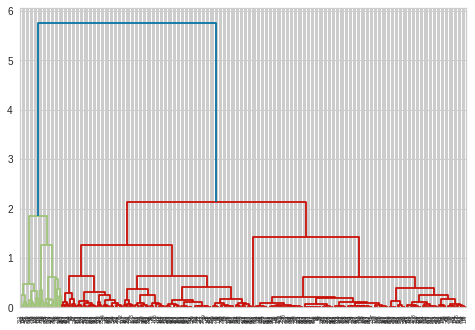

In [ ]:
cluster_dist_matrix = squareform(cluster_dist_matrix)
hc = sch.linkage(cluster_dist_matrix,method = 'ward')
dendrogram = sch.dendrogram(hc)

In [ ]:
import matplotlib
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

Metodo codo

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

OSError: ignored

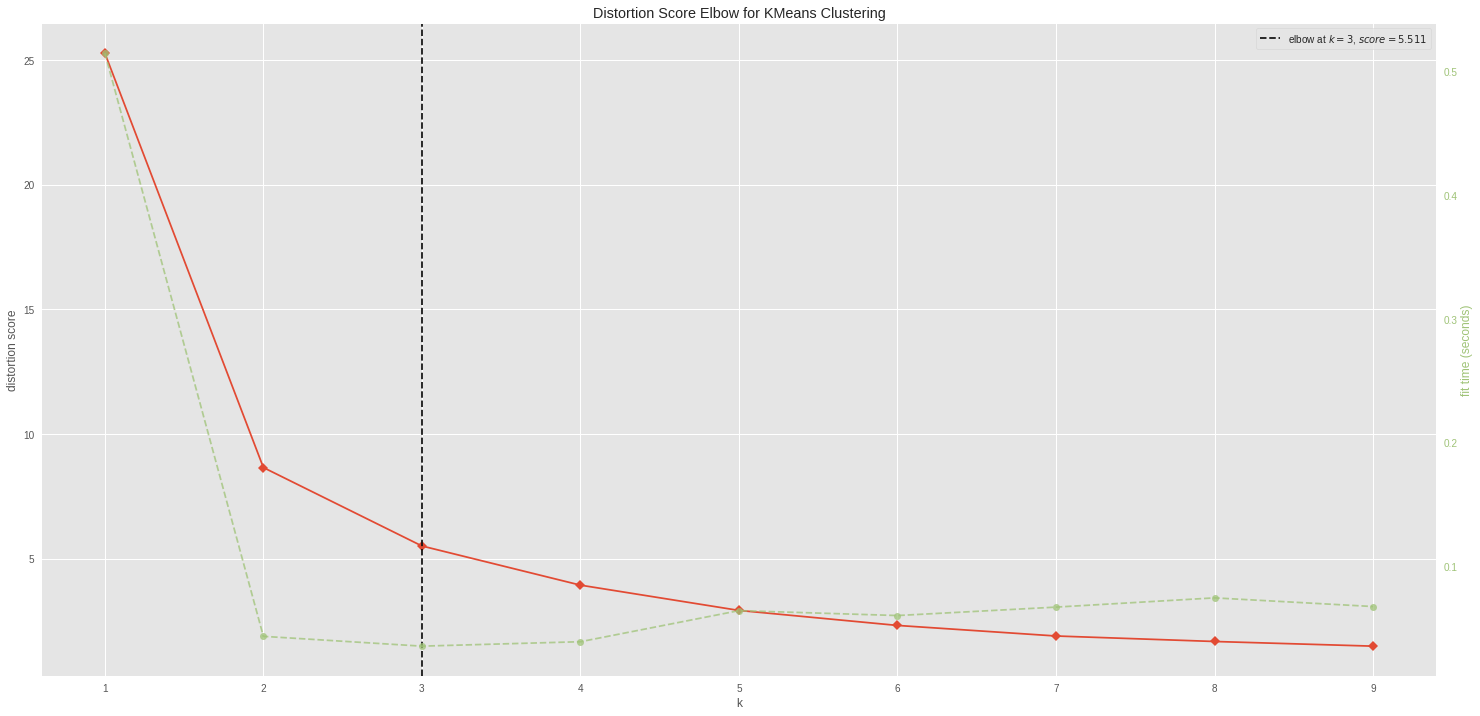

In [ ]:
modelo = KMeans()
visualizador = KElbowVisualizer(modelo, k=(1,10), timings=True)
visualizador.fit(df_agrupa)
visualizador.show()

In [ ]:
kmeansModelo = KMeans(n_clusters=3, max_iter=1000).fit(df_agrupa)
kmeansModeloLabels = kmeansModelo.labels_
print(kmeansModeloLabels)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 2
 1 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 2 0 0 0 1 0 2 1 1 0 2 2 0 2 1 0 0 0 1 2 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 2 2 0 1 0 0 1 0 0 1 1 2 1 0 2 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 2 2 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 2 0 1 0 0 0 0 0 0 0 1 1 1 0 2 1 2 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 2 1 0 0 1 1 0 0 1 1 0 0 0 0 0 2 0 1 0 0 0 0 0 2 0 0
 0 0 0 0 0 1 0]


In [ ]:
df4['cluster'] = kmeansModeloLabels
df_agrupa['cluster'] = kmeansModeloLabels

In [ ]:
df_agrupa

,Accidentes,Heridos,Daños,Muertos,cluster
BARRIO,,,,,
aguas frias,0.006111,0.119671,0.029502,0.000000,0
aldea pablo vi,0.004253,0.122244,0.024639,0.000000,0
alejandro echavarría,0.139280,0.318056,0.098752,0.006006,1
alejandría,0.077525,0.099812,0.158868,0.000000,0
alfonso lópez,0.153310,0.341031,0.105247,0.000000,1
...,...,...,...,...,...
yolombo,0.006032,0.097796,0.045295,0.000000,0
área de expansión altavista,0.000000,0.146693,0.000000,0.000000,0
área de expansión altos de calasanz,0.008713,0.087423,0.057159,0.000000,0


In [ ]:
cluster_0 = df4[df4['cluster'] == 0]
cluster_0.drop('cluster', axis=1).describe()

,Accidentes,Heridos,Daños,Muertos
count,72.000000,72.000000,72.000000,72.000000
mean,0.184195,0.313044,0.174753,0.005260
std,0.066960,0.069799,0.085473,0.004688
min,0.105561,0.154028,0.058209,0.000000
25%,0.136870,0.266801,0.106619,0.002774
50%,0.160694,0.303068,0.151371,0.004270
75%,0.195710,0.341516,0.221039,0.008259
max,0.361475,0.548891,0.424685,0.022923


In [ ]:
cluster_1 = df4[df4['cluster'] == 1]
cluster_1.drop('cluster', axis=1).describe()

,Accidentes,Heridos,Daños,Muertos
count,245.000000,245.000000,245.000000,245.000000
mean,0.032579,0.139407,0.057137,0.005511
std,0.031893,0.053144,0.036432,0.063899
min,0.000000,0.000000,0.000000,0.000000
25%,0.003903,0.110020,0.031027,0.000000
50%,0.022263,0.135051,0.052695,0.000000
75%,0.052606,0.168012,0.075901,0.000000
max,0.119192,0.279929,0.222947,1.000000


In [ ]:
cluster_2 = df_agrupa[df_agrupa['cluster'] == 2]
cluster_2.drop('cluster', axis=1).describe()

,Accidentes,Heridos,Daños,Muertos
count,23.000000,23.000000,23.000000,23.000000
mean,0.588308,0.683326,0.554534,0.014381
std,0.167104,0.189562,0.173596,0.008161
min,0.403191,0.422397,0.209160,0.002732
25%,0.448423,0.545070,0.467463,0.008219
50%,0.538434,0.624850,0.524212,0.013661
75%,0.665175,0.866733,0.634610,0.020492
max,1.000000,1.000000,1.000000,0.038251


Volvemos a las variables orignales

In [ ]:
df4[['Accidentes','Heridos','Daños','Muertos']] = scala.inverse_transform(df4[['Accidentes','Heridos','Daños','Muertos']])

In [ ]:
df4.groupby(['cluster']).mean()

,Accidentes,Heridos,Daños,Muertos
cluster,,,,
0,1.490999,0.950331,0.535157,0.005511
1,3.776016,2.133999,1.636757,0.005260
2,9.866409,4.658191,5.193836,0.014381


*  2: Alto riesgo de accidentes y peligro. Peligro alto
*  1: Peligro moderado. Peligro Medio 
*  0: Peligro bajo


In [ ]:
df4

,BARRIO,Accidentes,Heridos,Daños,Muertos,cluster
0,aguas frias,1.092105,0.815789,0.276316,0.000000,0
1,aldea pablo vi,1.064103,0.833333,0.230769,0.000000,0
2,alejandro echavarría,3.099099,2.168168,0.924925,0.006006,1
3,alejandría,2.168385,0.680412,1.487973,0.000000,0
4,alfonso lópez,3.310541,2.324786,0.985755,0.000000,1
...,...,...,...,...,...,...
335,yolombo,1.090909,0.666667,0.424242,0.000000,0
336,área de expansión altavista,1.000000,1.000000,0.000000,0.000000,0
337,área de expansión altos de calasanz,1.131313,0.595960,0.535354,0.000000,0
338,área de expansión pajarito,3.020649,2.312684,0.699115,0.008850,1


In [ ]:
import folium

m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [ ]:
df_agrupa

,Accidentes,Heridos,Daños,Muertos,cluster
BARRIO,,,,,
aguas frias,0.006111,0.119671,0.029502,0.000000,0
aldea pablo vi,0.004253,0.122244,0.024639,0.000000,0
alejandro echavarría,0.139280,0.318056,0.098752,0.006006,1
alejandría,0.077525,0.099812,0.158868,0.000000,0
alfonso lópez,0.153310,0.341031,0.105247,0.000000,1
...,...,...,...,...,...
yolombo,0.006032,0.097796,0.045295,0.000000,0
área de expansión altavista,0.000000,0.146693,0.000000,0.000000,0
área de expansión altos de calasanz,0.008713,0.087423,0.057159,0.000000,0


In [ ]:
df_puntos=df.copy()
df_puntos['BARRIO'] = df_puntos['BARRIO'].apply(lambda x : x.lower().replace("` ",""))
df_puntos=df_puntos[['BARRIO','LONGITUD','LATITUD']]
Barrios=df_puntos['BARRIO'].unique()
len(Barrios)
Puntos_estrategicos=pd.DataFrame()
for i in Barrios:
  df_eliminados=df_puntos.loc[df_puntos["BARRIO"]==i]
  df_eliminados=df_eliminados.reset_index()
  Puntos_estrategicos=Puntos_estrategicos.append(df_eliminados.iloc[[0]])
Puntos_estrategicos=Puntos_estrategicos.sort_values('BARRIO')
Puntos_estrategicos=Puntos_estrategicos.set_index("BARRIO")
Puntos_estrategicos["cluster"]=df_agrupa["cluster"]
Puntos_estrategicos

,index,LONGITUD,LATITUD,cluster
BARRIO,,,,
aguas frias,672,-75.624391,6.234261,0
aldea pablo vi,1710,-75.541984,6.286620,0
alejandro echavarría,19,-75.550389,6.239624,1
alejandría,793,-75.571822,6.202810,0
alfonso lópez,148,-75.573980,6.284200,1
...,...,...,...,...
yolombo,20078,-75.607470,6.296610,0
área de expansión altavista,83895,-75.614058,6.220460,0
área de expansión altos de calasanz,4161,-75.604598,6.268308,0


In [ ]:
Puntos_estrategicos.reset_index(inplace=True)
Puntos_estrategicos

,BARRIO,index,LONGITUD,LATITUD,cluster
0,aguas frias,672,-75.624391,6.234261,0
1,aldea pablo vi,1710,-75.541984,6.286620,0
2,alejandro echavarría,19,-75.550389,6.239624,1
3,alejandría,793,-75.571822,6.202810,0
4,alfonso lópez,148,-75.573980,6.284200,1
...,...,...,...,...,...
335,yolombo,20078,-75.607470,6.296610,0
336,área de expansión altavista,83895,-75.614058,6.220460,0
337,área de expansión altos de calasanz,4161,-75.604598,6.268308,0
338,área de expansión pajarito,185,-75.608769,6.289854,1


In [ ]:
file = open("Clusters_Barrios.pkl", "wb")
pickle.dump(Puntos_estrategicos, file)

In [ ]:
MapaFrame =Puntos_estrategicos[['LONGITUD','LATITUD','BARRIO','cluster']]

In [ ]:
for i in range(0,len(MapaFrame)):
   if MapaFrame.iloc[i]['cluster'] == 0: color1 = "blue"
   elif MapaFrame.iloc[i]['cluster'] == 1: color1 = "green"
   else: color1 = "red"
   folium.Marker(
      location=[MapaFrame.iloc[i]['LATITUD'], MapaFrame.iloc[i]['LONGITUD']],
      icon=folium.Icon(color=color1) , popup = MapaFrame.iloc[i]['BARRIO']
   ).add_to(m)

m

In [ ]:
m.save("mapa.html")